In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingCVClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [3]:
df = pd.read_excel(r'defaultofcreditcardclients.xls')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,male,high school,married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,male,high school,single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,male,university,single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,male,high school,married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
df.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000,30000,30000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,NaN,2,5,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,female,university,single,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,18112,14030,15964,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15000.500000,167484.322667,NaN,NaN,NaN,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,NaN,NaN,NaN,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,NaN,NaN,NaN,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,NaN,NaN,NaN,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,NaN,NaN,NaN,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,NaN,NaN,NaN,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000


In [5]:
df.isnull().sum() 

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [9]:
df.drop(['ID'], axis=1,inplace= True)

In [11]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,female,university,married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,female,university,single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,female,university,single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,female,university,married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,male,university,married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,male,high school,married,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,male,high school,single,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,male,university,single,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,male,high school,married,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [13]:
data_cat = df.copy()

In [15]:
data_dummy = df.copy()

In [17]:
data_dummy = pd.get_dummies(data_dummy, drop_first= True).astype(int)

In [19]:
data_dummy.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT5,PAY_AMT6,default,SEX_male,EDUCATION_high school,EDUCATION_not educated,EDUCATION_others,EDUCATION_university,MARRIAGE_others,MARRIAGE_single
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,1,0,0,0,0,1,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,...,0,2000,1,0,0,0,0,1,0,1
2,90000,34,0,0,0,0,0,0,29239,14027,...,1000,5000,0,0,0,0,0,1,0,1
3,50000,37,0,0,0,0,0,0,46990,48233,...,1069,1000,0,0,0,0,0,1,0,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,689,679,0,1,0,0,0,1,0,0


In [21]:
data_cat.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,female,university,married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,female,university,single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,female,university,single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,female,university,married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,male,university,married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [23]:
inputs = data_dummy.drop('default', axis=1)
output = data_dummy['default']

X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [25]:
inputs = data_cat.drop('default', axis=1)
output = data_cat['default']

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

def train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    try:
        model.fit(X_train, y_train)
        
        y_pred_train = model.predict(X_train)
        y_prob_train = model.predict_proba(X_train)[:, 1]

        roc_prob_train = roc_auc_score(y_train, y_prob_train)
        gini_prob_train = roc_prob_train * 2 - 1
        confusion_matrix_result_train = confusion_matrix(y_train, y_pred_train)
        classification_report_result_train = classification_report(y_train, y_pred_train)
        
        print(f'Model Performance for {model_name}')
        print('Train Gini prob is', gini_prob_train * 100)
        print(classification_report_result_train)
        print(confusion_matrix_result_train)

        y_pred_test = model.predict(X_test)
        y_prob_test = model.predict_proba(X_test)[:, 1]

        roc_prob_test = roc_auc_score(y_test, y_prob_test)
        gini_prob_test = roc_prob_test * 2 - 1
        confusion_matrix_result_test = confusion_matrix(y_test, y_pred_test)
        classification_report_result_test = classification_report(y_test, y_pred_test)

        print(f'Model Performance for {model_name}')
        print('Test Gini prob is', gini_prob_test * 100)
        print(classification_report_result_test)
        print(confusion_matrix_result_test)

        return [gini_prob_train, gini_prob_test]

    except Exception as e:
        print(f"An error occurred while evaluating the model {model_name}: {e}")
        return None


In [29]:
models = []

xgb_model_def = XGBClassifier(random_state=42)
lgb_model_def = LGBMClassifier(random_state=42)
catboost_model_def = CatBoostClassifier(random_state=42)
catboost_model_custom = CatBoostClassifier(cat_features=['SEX', 'EDUCATION', 'MARRIAGE'], random_state=42)
random_classifier = RandomForestClassifier(random_state=42)
models.extend([
    ('XGBoost', xgb_model_def),
    ('LightGBM', lgb_model_def),
    ('CatBoost', catboost_model_def),
    ('CatBoost_Custom', catboost_model_custom),
    ('RandomeForest', random_classifier)
])

In [31]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
gini_df = pd.DataFrame(columns=['Model', 'Train Gini', 'Test Gini'])

for model_name, model in models:
    if model_name == 'CatBoost_Custom':
        gini_prob = train_and_evaluate_model(model_name, model, X_train_cat, y_train_cat, X_test_cat, y_test_cat)
    else:
        gini_prob = train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test)

    if gini_prob is not None:
        gini_df = pd.concat([gini_df, pd.DataFrame({'Model': [model_name], 'Train Gini': [gini_prob[0]], 'Test Gini': [gini_prob[1]]})], ignore_index=True)

gini_df_sorted = gini_df.sort_values(by='Test Gini', ascending=False)



Model Performance for XGBoost
Train Gini prob is 90.034029937814
              precision    recall  f1-score   support

           0       0.89      0.98      0.94     16324
           1       0.91      0.59      0.72      4676

    accuracy                           0.90     21000
   macro avg       0.90      0.79      0.83     21000
weighted avg       0.90      0.90      0.89     21000

[[16044   280]
 [ 1908  2768]]
Model Performance for XGBoost
Test Gini prob is 51.881102156771796
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.61      0.36      0.46      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000

[[6588  452]
 [1245  715]]
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4676, number of negative: 16324
[Light

C:\Users\User\AppData\Local\Temp\ipykernel_11608\2603988767.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gini_df = pd.concat([gini_df, pd.DataFrame({'Model': [model_name], 'Train Gini': [gini_prob[0]], 'Test Gini': [gini_prob[1]]})], ignore_index=True)
C:\Users\User\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\User\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores


Model Performance for LightGBM
Train Gini prob is 77.55004570618624
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     16324
           1       0.77      0.44      0.56      4676

    accuracy                           0.85     21000
   macro avg       0.81      0.70      0.73     21000
weighted avg       0.84      0.85      0.83     21000

[[15707   617]
 [ 2605  2071]]
Model Performance for LightGBM
Test Gini prob is 54.81135493970313
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.65      0.36      0.47      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000

[[6662  378]
 [1246  714]]
Learning rate set to 0.037803
0:	learn: 0.6717230	total: 151ms	remaining: 2m 30s
1:	learn: 0.6518856	total: 160ms	remaining: 1m 19s
2:	learn: 0.6338459	t

In [32]:
gini_df_sorted

,Model,Train Gini,Test Gini
3,CatBoost_Custom,0.766574,0.554453
2,CatBoost,0.788224,0.552097
1,LightGBM,0.775500,0.548114
0,XGBoost,0.900340,0.518811
4,RandomeForest,0.999994,0.515400


In [33]:
from sklearn.model_selection import cross_val_score
import optuna

def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 10, 100)
    }

    lgb_clf = LGBMClassifier(**param)

    auc = cross_val_score(lgb_clf, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=1)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_lgb_model = LGBMClassifier(**best_params)

[I 2025-01-18 12:16:04,647] A new study created in memory with name: no-name-70354c3f-db1e-4ca4-98a7-06c4d7c3214d
C:\Users\User\AppData\Local\Temp\ipykernel_11608\3574865128.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
[I 2025-01-18 12:16:09,938] Trial 0 finished with value: 0.7793481355279432 and parameters: {'n_estimators': 716, 'learning_rate': 0.027224941813548176, 'max_depth': 3, 'num_leaves': 63}. Best is trial 0 with value: 0.7793481355279432.


Best trial:
  Value: 0.779
  Params:  {'n_estimators': 716, 'learning_rate': 0.027224941813548176, 'max_depth': 3, 'num_leaves': 63}


In [34]:
def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_uniform('subsample', 0.5,1), #  fraction of the training data used to train each tree.
         # Using a fraction of the data can help to prevent overfitting and improve generalization.
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5,1), #Subsample ratio of columns when constructing each tree.
        'gamma': trial.suggest_int('gamma', 0,5) 
        # Increasing the gamma value can help to prevent overfitting
        # Should be used only when you are using high depth
}
    xgb_clf = XGBClassifier(**param)

    auc = cross_val_score(xgb_clf, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=10)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_xgb_model = XGBClassifier(**best_params)

[I 2025-01-18 12:16:09,948] A new study created in memory with name: no-name-c190506d-b053-4bdd-8941-0f37fc6c4ec2
C:\Users\User\AppData\Local\Temp\ipykernel_11608\2328382279.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\User\AppData\Local\Temp\ipykernel_11608\2328382279.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5,1), #  fraction of the training data used to train each tree.
C:\Users\User\AppData\Local\Temp\ipykernel_11608\2328382279.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See h

Best trial:
  Value: 0.785
  Params:  {'n_estimators': 711, 'learning_rate': 0.031565565275636934, 'max_depth': 7, 'subsample': 0.638606862838422, 'colsample_bytree': 0.866586421536304, 'gamma': 5}


In [35]:
def best_params_for_model(trial):

    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), # Regularization term that prevents overfitting by penalizing large parameter values.
        # 'cat_features': [],  # Handle categorical features separately
        'loss_function': trial.suggest_categorical('loss_function', ['Logloss']) # For regression tasks, use ‘RMSE,’ while for classification, use ‘Logloss’.
    }

    cb_clf = CatBoostClassifier(**param)

    auc = cross_val_score(cb_clf, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=1)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_cb_model = CatBoostClassifier(**best_params)

[I 2025-01-18 12:16:24,995] A new study created in memory with name: no-name-ee6f7e72-b665-4dbe-9f63-9c15b57c021e
C:\Users\User\AppData\Local\Temp\ipykernel_11608\1299305732.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\User\AppData\Local\Temp\ipykernel_11608\1299305732.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), # Regularization term that prevents overfitting by penalizing large parameter values.
[I 2025-01-18 12:16:31,690] Trial 0 finished with value: 0.7559190285915155 and parameters: {'iterations': 468, 'learn

Best trial:
  Value: 0.756
  Params:  {'iterations': 468, 'learning_rate': 0.1760439061562455, 'depth': 6, 'l2_leaf_reg': 0.925600177158537, 'loss_function': 'Logloss'}


In [36]:
models_optimized = []

models_optimized.extend([
    ('XGBoost Optuna', best_xgb_model),
    ('LightGBM Optuna', best_lgb_model),
    ('CatBoost Optuna', best_cb_model),
     ('RandomeForest Optuna', random_classifier)
    
])

In [37]:
gini_df_optuna = pd.DataFrame(columns=['Model', 'Train Gini', 'Test Gini'])

for model_name, model in models_optimized:
    gini_prob = train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test)
    if gini_prob is not None:
        gini_df_optuna = pd.concat([gini_df_optuna, pd.DataFrame({'Model': [model_name], 'Train Gini': [gini_prob[0]], 'Test Gini': [gini_prob[1]]})], ignore_index=True)

gini_df_sorted_optuna = gini_df_optuna.sort_values(by='Test Gini', ascending=False)

gini_df_sorted_optuna


Model Performance for XGBoost Optuna
Train Gini prob is 68.70065440233056
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     16324
           1       0.73      0.41      0.52      4676

    accuracy                           0.83     21000
   macro avg       0.79      0.68      0.71     21000
weighted avg       0.82      0.83      0.82     21000

[[15607   717]
 [ 2760  1916]]
Model Performance for XGBoost Optuna
Test Gini prob is 55.996267683209645
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.66      0.36      0.47      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000

[[6682  358]
 [1257  703]]
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4676, number of negati

C:\Users\User\AppData\Local\Temp\ipykernel_11608\2609667454.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gini_df_optuna = pd.concat([gini_df_optuna, pd.DataFrame({'Model': [model_name], 'Train Gini': [gini_prob[0]], 'Test Gini': [gini_prob[1]]})], ignore_index=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

,Model,Train Gini,Test Gini
0,XGBoost Optuna,0.687007,0.559963
1,LightGBM Optuna,0.645642,0.557188
2,CatBoost Optuna,0.910369,0.525898
3,RandomeForest Optuna,0.999994,0.515400


In [38]:
final_review = pd.concat([gini_df_sorted,gini_df_sorted_optuna], axis=0)

final_review_sorted = final_review.sort_values(by='Test Gini', ascending=False)
final_review_sorted.reset_index(drop=True, inplace=True)

final_review_sorted

,Model,Train Gini,Test Gini
0,XGBoost Optuna,0.687007,0.559963
1,LightGBM Optuna,0.645642,0.557188
2,CatBoost_Custom,0.766574,0.554453
3,CatBoost,0.788224,0.552097
4,LightGBM,0.775500,0.548114
5,CatBoost Optuna,0.910369,0.525898
6,XGBoost,0.900340,0.518811
7,RandomeForest,0.999994,0.515400
8,RandomeForest Optuna,0.999994,0.515400


In [39]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

def plot_feature_importances(model, feature_names, normalize=True):
    importances = model.feature_importances_
    
    if normalize:
        importances = importances / importances.sum() 
    
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by="Importance", ascending=False)
    
    plt.figure(figsize=(10, 9))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.title("Feature Importances")
    plt.xlabel("Normalized Importance Score" if normalize else "Importance Score")
    plt.ylabel("Feature")
    plt.gca().invert_yaxis()
    plt.show()
    
    return importance_df

def compute_and_plot_shap_and_importances(model_name, model, X_train, feature_names=None):
    try:
        explainer = shap.Explainer(model, X_train)
        shap_values = explainer(X_train)

        print(f"SHAP Values Summary for {model_name}")
        plt.figure(figsize=(10, 6))
        shap.summary_plot(shap_values, X_train, feature_names=feature_names, show=False)
        plt.tight_layout()
        plt.show()

        feature_importance_df = plot_feature_importances(model, X_train.columns, normalize=True)
        return feature_importance_df

    except Exception as e:
        print(f"An error occurred while computing SHAP values and feature importances for {model_name}: {e}")
        return None


100%|===================| 41997/42000 [48:52<00:00]        

SHAP Values Summary for LGBMClassifier(learning_rate=0.027224941813548176, max_depth=3,
               n_estimators=716, num_leaves=63)


<Figure size 1000x600 with 0 Axes>

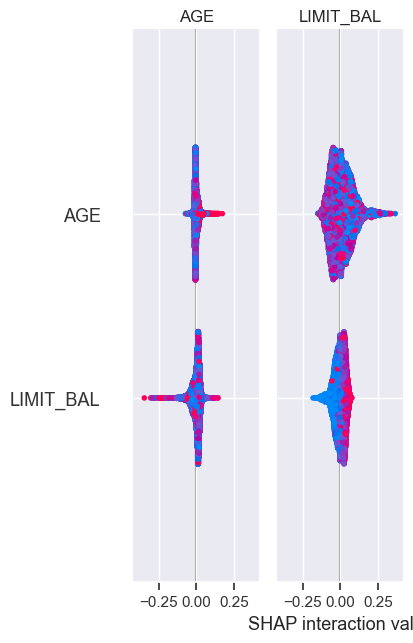

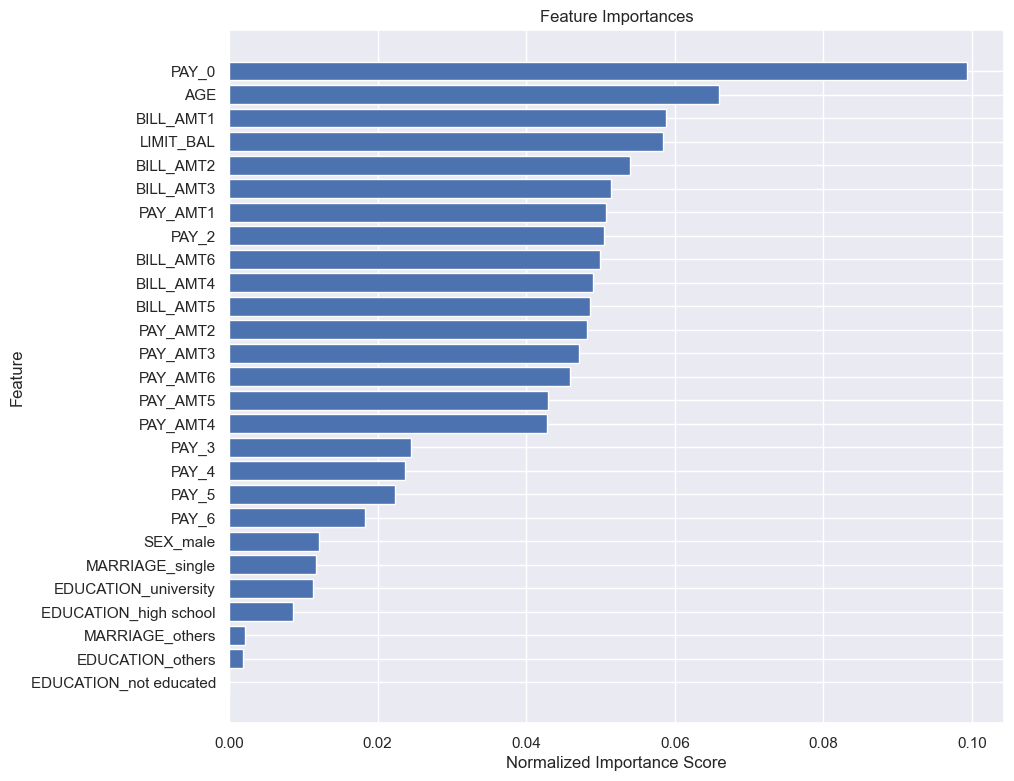

,Feature,Importance
2,PAY_0,0.099364
1,AGE,0.065958
8,BILL_AMT1,0.058835
0,LIMIT_BAL,0.058455
9,BILL_AMT2,0.053998
10,BILL_AMT3,0.051465
14,PAY_AMT1,0.050727
3,PAY_2,0.050461
13,BILL_AMT6,0.049890
11,BILL_AMT4,0.048920


In [40]:
compute_and_plot_shap_and_importances(
            best_lgb_model, model, X_train, feature_names=X_train.columns)

In [41]:
X_train.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_male', 'EDUCATION_high school',
       'EDUCATION_not educated', 'EDUCATION_others', 'EDUCATION_university',
       'MARRIAGE_others', 'MARRIAGE_single'],
      dtype='object')

In [42]:
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve, auc

variables = []
train_gini_scores = []
test_gini_scores = []


for i in X_train[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_male',
         'EDUCATION_university',
        'MARRIAGE_single']]:
    X_train_single_var = X_train[[i]]
    X_test_single_var = X_test[[i]]

    best_lgb_model.fit(X_train_single_var, y_train)
    y_pred_train_single_var = best_lgb_model.predict_proba(X_train_single_var)[:, 1]
    train_roc = roc_auc_score(y_train, y_pred_train_single_var)
    train_gini = 2 * train_roc - 1

    y_pred_test_single_var = best_lgb_model.predict_proba(X_test_single_var)[:, 1]
    test_roc = roc_auc_score(y_test, y_pred_test_single_var)
    test_gini = 2 * test_roc - 1

    variables.append(i)
    train_gini_scores.append(train_gini)
    test_gini_scores.append(test_gini)

results_df = pd.DataFrame({
    'Variable': variables,
    'Train Gini': train_gini_scores,
    'Test Gini': test_gini_scores
})

results_df_sorted = results_df.sort_values(by='Test Gini', ascending=False)

pd.options.display.float_format = '{:.4f}'.format




[LightGBM] [Info] Number of positive: 4676, number of negative: 16324
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 73
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222667 -> initscore=-1.250193
[LightGBM] [Info] Start training from score -1.250193
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [43]:
pd.set_option('display.max_rows', None)

In [44]:
results_df_sorted

,Variable,Train Gini,Test Gini
2,PAY_0,0.4291,0.4148
3,PAY_2,0.3137,0.2742
4,PAY_3,0.2766,0.2436
14,PAY_AMT1,0.2887,0.2289
5,PAY_4,0.2427,0.2288
0,LIMIT_BAL,0.2508,0.2267
6,PAY_5,0.2181,0.2199
15,PAY_AMT2,0.2680,0.2087
16,PAY_AMT3,0.2457,0.2040
7,PAY_6,0.2087,0.1920


In [45]:
results_df_sorted.Variable.tolist()

['PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_AMT1',
 'PAY_4',
 'LIMIT_BAL',
 'PAY_5',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_6',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'BILL_AMT5',
 'BILL_AMT6',
 'BILL_AMT4',
 'BILL_AMT1',
 'BILL_AMT2',
 'AGE',
 'BILL_AMT3',
 'SEX_male',
 'MARRIAGE_single',
 'EDUCATION_university']

In [46]:
pd.reset_option('display.max_rows')

In [47]:
fin_input = data_dummy[['PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_AMT1',
 'LIMIT_BAL',
 'PAY_4',
 'PAY_5',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_6',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']]
fin_output =data_dummy['default']

X_train_uni, X_test_uni, y_train_uni, y_test_uni = train_test_split(fin_input, fin_output, test_size=0.3, random_state=42)

model_fin = best_lgb_model.fit(X_train_uni,y_train_uni)

[LightGBM] [Info] Number of positive: 4676, number of negative: 16324
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001831 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1665
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222667 -> initscore=-1.250193
[LightGBM] [Info] Start training from score -1.250193
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [48]:
train_and_evaluate_model('LGB for selected features', model_fin, X_train_uni, y_train_uni, X_test_uni, y_test_uni)

[LightGBM] [Info] Number of positive: 4676, number of negative: 16324
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001863 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1665
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222667 -> initscore=-1.250193
[LightGBM] [Info] Start training from score -1.250193
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[0.6243089310579666, 0.54073689703154]

In [69]:
from mlxtend.classifier import StackingCVClassifier

In [75]:
clf1 = best_xgb_model
clf2 = catboost_model_def

In [77]:
meta_classifier = best_lgb_model

In [ ]:
# Define the stacking classifier
stacking_classifier = StackingCVClassifier(classifiers=[clf1, clf2],
                                           meta_classifier=meta_classifier,
                                           cv=5,
                                           use_probas=True,
                                           use_features_in_secondary=True,
                                           verbose=1,
                                           random_state=42)